 # Project Stage 1 Group 23

In [1]:
library(tidyverse)
library(broom)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




Read the data excluding Region 1

In [2]:
shop<-read.csv("shopper.csv")|>
filter(Region!=1)
head(shop)
num<-nrow(shop)
num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000,0.20000000,0,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,2.666667,0.05000,0.14000000,0,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
3,0,0,0,0,1,0.000000,0.20000,0.20000000,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,37.000000,0.00000,0.10000000,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,3,395.000000,0.00000,0.06666667,0,0.0,Feb,1,1,3,3,Returning_Visitor,FALSE,FALSE
6,0,0,0,0,16,407.750000,0.01875,0.02583333,0,0.4,Feb,1,1,4,3,Returning_Visitor,FALSE,FALSE


[1] 7550

**Descriptive summary**\
This data set `shop` (Sakar, C. & Kastro, Y. ,2018) contains 18 different variables and 7550 observations after excluding Region 1. There are three different types of variables:

- Numeric: `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration` ,`BounceRates`, `ExitRates`, `PageValues`, `SpecialDay`, `OperatingSystems`, `Browser`, `Region`. However, we consider `Region`, `OperatingSystems`, `Brower`as categorical variables. Also, some of these numeric variables are continous but some are integers.

- Categorical:` Month`, `VisitorType`.

- Logical/binary: `Weekend`, `Revenue`.

**Source and information**\
The dataset was collected by tracking users’ actions related to product purchases. It includes information such as the webpages they visited, the dates of their browsing sessions, whether they were new or returning visitors, and other relevant details. In addition, the dataset was constructed so that each session corresponds to a unique user within a one-year period, in order to avoid bias toward any particular campaign, special day, user profile, or time period.

`Administrative`: the number of Administrative-type pages the visitor viewed during the session. These page categories are inferred from the page URL structure.

`Administrative_Duration`: the total time (in seconds) the visitor spent on Administrative pages during the session. This value is tracked and updated in real time as the user navigates.

`Informational`: the number of Informational-type pages the visitor viewed in the session.

`Informational_Duration`: the total time (in seconds) the visitor spent on Informational pages.

`ProductRelated`: the number of Product-related pages the visitor viewed during the session.

`ProductRelated_Duration`: the total time (in seconds) spent on Product-related pages during the session.

`BounceRates`: the average bounce rate of the pages visited in the session. In Google Analytics, bounce rate is the percentage of sessions where the user enters the site from a page and leaves without interacting further.

`ExitRates`: the average exit rate of the pages visited in the session. Exit rate is the percentage of pageviews that were the final page in the user’s session.

`PageValues`: the average page value of the pages visited before completing a transaction. Page value, defined by Google Analytics, represents the expected monetary value contributed by each page toward an eventual purchase.

`SpecialDay`: a value between 0 and 1 measuring how close the session date is to a major special day (e.g., Mother’s Day, Valentine’s Day). Values increase as the visit date approaches the special day and reach a maximum of 1 at the point of highest purchase likelihood.

`Month`: the month of the session, recorded as a categorical variable using month abbreviations (e.g., “Feb”, “Mar”, “Apr”, …).

`OperatingSystems`: a numeric code representing the visitor’s operating system (e.g., Windows, MacOS, Linux, mobile OS). Values range from 1 to 8.

`Browser`: a numeric code representing the browser used (values range from 1 to 13).

`Region`: a numeric code (1–9) indicating the visitor’s geographic region.

`TrafficType`: a numeric code (1–20) indicating the external traffic source that led the visitor to the site.

`VisitorType`: a categorical variable indicating whether the visitor is a `Returning_Visitor`, `New_Visitor`, or belongs to another type.

`Weekend`: a Boolean variable indicating whether the session occurred on a weekend (`TRUE`) or on a weekday (`FALSE`).

`Revenue`: a Boolean variable indicating whether the visitor completed an online purchase during the session (`TRUE`) or not (`FALSE`).


**Pre-selection of variables**
- The dataset includes several page-related variables such as `Administrative`, `Informational`, and `ProductRelated`, which count how many pages of each type the user viewed. These variables provide similar information to their duration counterparts.
- To reduce redundancy, we focus on the corresponding duration variables: `Administrative_Duration`, `Informational_Duration`, and `ProductRelated_Duration`, since duration captures both page type and time spent, making it more informative than simple page counts.
- Variables such as `BounceRates` and `ExitRates` may be correlated. To avoid redundancy in regression, we may keep only one of them, such as `ExitRates`.
- Broader categorical variables such as `Month` may be less interpretable for understanding purchasing behaviour, so we prioritize more directly relevant variables such as `SpecialDay`.


Data sourse: Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.




We aim to study the association between whether a customer makes a purchase (`Revenue`) and the explanatory variables `SpecialDay`, `Region`, and `ExitRates`. Specifically, we ask whether these factors help explain or predict the likelihood that a user completes a purchase.

- Response:
  The response variable is `Revenue` (`TRUE/FALSE`), indicating whether the customer purchased a product.

Our primary focus is **inference**: we want to understand how user behavior and contextual factors (special days, regional differences, exit rates) are associated with purchase probability. As a secondary objective, the model can also provide **prediction** into which sessions are more likely to lead to a transaction.
Since `Revenue` is a binary variable, we use **logistic regression** to model the probability of purchase as a function of the selected explanatory variables.



In [3]:
dat <- shop %>%
  mutate(
    Revenue01 = case_when(
      is.logical(Revenue) ~ as.integer(Revenue),
      tolower(as.character(Revenue)) %in% c("TRUE")  ~ 1L, 
      tolower(as.character(Revenue)) %in% c("FALSE") ~ 0L,
      
    ),
    Region = factor(Region)  #Make Revenue01 numeric (1 and 0), and make Region a factor so it will not be treated as a numeric variable.
  ) 


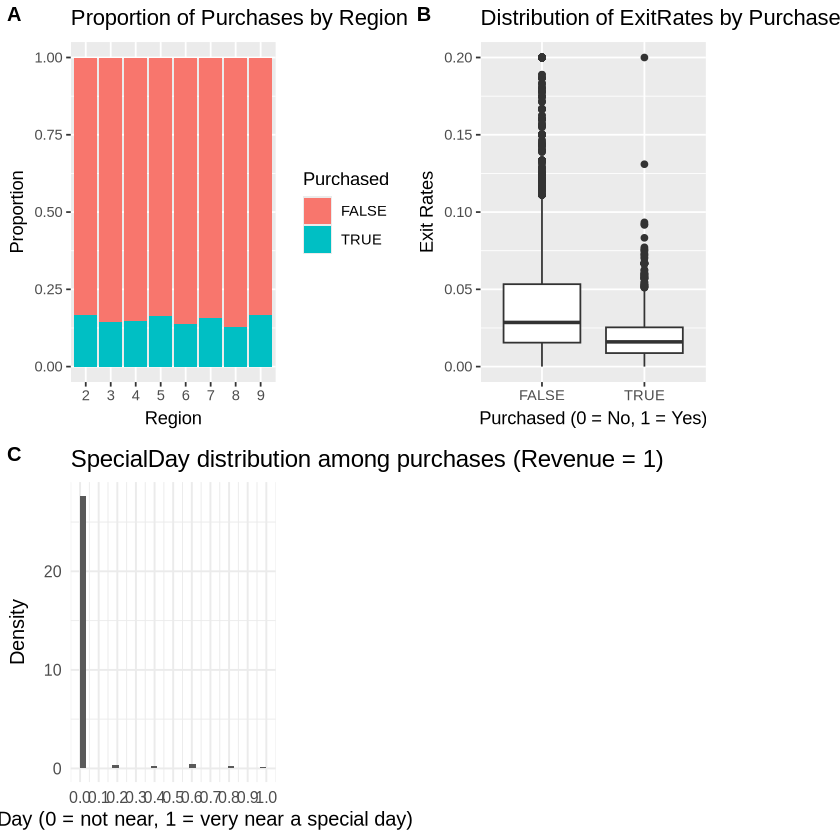

In [4]:
#bar plot for exploring the association between region and revenue
region_plot<- ggplot(dat, aes(x = Region, fill = as.factor(Revenue))) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", fill = "Purchased",
       title = "Proportion of Purchases by Region")

#box plot for exploring the association between exitrates and revenue
exrate_plot<- ggplot(dat, aes(x = as.factor(Revenue), y = ExitRates)) +
  geom_boxplot() +
  labs(x = "Purchased (0 = No, 1 = Yes)", y = "Exit Rates",
       title = "Distribution of ExitRates by Purchase Outcome")

#density plot for exploring the association between how close to a speciaday and revenue
special<- dat|>
filter(Revenue01 == 1)%>%
ggplot(aes(x = SpecialDay)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins = 30, boundary = 0, closed = "right") +
  labs(
    title = "SpecialDay distribution among purchases (Revenue = 1)",
    x = "SpecialDay (0 = not near, 1 = very near a special day)",
    y = "Density"
  ) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.1)) +
  theme_minimal(base_size = 12)

#combine all the plot
one_graph <- plot_grid(
  region_plot,exrate_plot, special, 
  ncol = 2, align = "hv",
  rel_heights = c(1.1, 1),     
  rel_widths = c(1, 1.05),     
  labels = c("A", "B", "C"),  
  label_size = 12,
  label_fontface = "bold")


  
one_graph

These visualizations are directly related to our research question about what factors are associated with customers’ purchasing intentions. They allow us to visually assess potential relationships between the response variable Revenue and explanatory variables before running formal regression analysis. The plots help identify which predictors may have stronger or weaker associations with the outcome.
- The stacked bar plot for `Region` is used because it shows the proportion of `Revenue` outcomes within each category, helping us check whether regional differences are meaningful.
- The boxplot for `ExitRates` by purchase status is appropriate because `ExitRates` is continuous, and the boxplot clearly compares its distribution across `Revenue = TRUE` and `Revenue = FALSE`.
- The density plot for `SpecialDay` illustrates the distribution of a continuous variable between 0 and 1, helping us determine whether there is enough variation for modeling.
  
**Findings**
- From Plot A, we can see that the proportion of purchases across different `Regions` is fairly similar. This suggests that Region may not be a significant predictor when studying the likelihood of purchase.

- In Plot B, the difference in `ExitRates` between customers who purchased and those who did not is clearly visible. This indicates that `ExitRates` could be a relevant explanatory variable for predicting purchasing behavior.

- The distribution of `SpecialDay` in Plot C is heavily right-skewed, meaning that most browsing sessions occur far from special days. This pattern implies that proximity to a special day might have assotiation on whether a customer makes a purchase.


**Method and Plan**
- As written in the pre-selection section, a logistic regression model will be used with `Revenue` as the binary response and variables such as `SpecialDay`, `ExitRates`, and `Region` as potential input variables. However, all variables that are not considered redundant will be included in the model for exploratory purposes.

- Logistic regression is appropriate because the goal is to model the probability of purchase, and the response variable is binary.

- This analysis is primarily an **inference** study because the aim is to determine which variables are associated with purchasing behaviour and whether they contribute significantly to explaining the response. The logistic regression model allows us to evaluate these associations through statistical significance and estimated effects.

- This method is appropriate because it models how the log-odds of purchase depend on multiple predictors, allowing us to assess the associations between user behaviour variables and the probability of completing a transaction.

- Logistic regression assumes that observations are independent, that each predictor has an approximately linear relationship with the log-odds of the response, and that the response variable is binary, which is satisfied in this dataset.

- Potential limitations: Logistic regression is sensitive to nonlinearity. The method can also be affected by multicollinearity, especially when many variables are included for exploration. Logistic regression does not automatically account for interaction or nonlinear effects unless they are explicitly added. Additionally, model fit is less straightforward to assess than in linear regression because residuals are harder to interpret, so likelihood-based measures or classification performance are often used instead.


In [5]:
#full model with all variables except redundant variables
m_full <- glm(
  Revenue01 ~ Administrative_Duration +
    Informational_Duration +
    ProductRelated_Duration +
    ExitRates +
    PageValues +
    SpecialDay +
    OperatingSystems +
    Browser +
    Region +
    TrafficType +
    VisitorType +
    Weekend,
  data = dat,
  family = binomial
)
#get the results for coefficients and p-value
result <- tidy(m_full, conf.int = TRUE,  exponentiate = TRUE)
#sort the results by ascending p-value
result_sorted <- result %>%
  arrange(p.value)
result_sorted

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PageValues,1.085328e+00,3.079912e-03,26.5860383,9.845064e-156,1.078904e+00,1.092010e+00
(Intercept),1.877644e-01,1.817387e-01,-9.2031436,3.476280e-20,1.311200e-01,2.673976e-01
ExitRates,7.724465e-08,2.024064e+00,-8.0907954,5.927636e-16,1.255565e-09,3.498245e-06
ProductRelated_Duration,1.000133e+00,2.019542e-05,6.5909879,4.369096e-11,1.000093e+00,1.000173e+00
VisitorTypeReturning_Visitor,7.047449e-01,1.086213e-01,-3.2214620,1.275384e-03,5.705453e-01,8.735531e-01
SpecialDay,4.366565e-01,2.732407e-01,-3.0325218,2.425196e-03,2.489329e-01,7.285589e-01
WeekendTRUE,1.274381e+00,8.866936e-02,2.7344309,6.248822e-03,1.069815e+00,1.514667e+00
Region5,7.108358e-01,2.245103e-01,-1.5202591,1.284459e-01,4.522283e-01,1.092098e+00
OperatingSystems,9.322617e-01,5.036164e-02,-1.3927601,1.636924e-01,8.440031e-01,1.028199e+00


**Interpretation of the results**
- The logistic regression shows that both `ExitRates` and `SpecialDay` are statistically associated with purchase probability. However, although ExitRates has an extremely small p-value, its odds ratio is about 7.7*10^8, suggesting that its effect is so small that it is not practically meaningful, which is unexpected given the clear separation seen in the exploratory boxplot.
- In contrast, SpecialDay shows a stronger practical effect, with an odds ratio of 0.437, indicating a meaningful decrease in purchase odds as the day gets closer to a special event.
- All Region indicators have large p-values, confirming that regional differences do not meaningfully explain purchasing behaviour.
